In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploratory Data Analysis (EDA) 

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


**1.** Look at the shape of data

In [ ]:
Data.shape

(891, 12)

**2.** Information about numerical features

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3.** Information about all features

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4.** Get information about columns

Survived

In [ ]:
Data['Survived'].value_counts() #dropna=False

0    549
1    342
Name: Survived, dtype: int64

Pclass

In [ ]:
Data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex

In [ ]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

How to handle 'Sex'?

**5.** Is the sex an important feature?

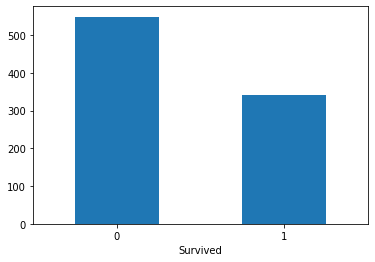

In [ ]:
Data.groupby('Survived').count()['Sex'].plot.bar(rot=0)

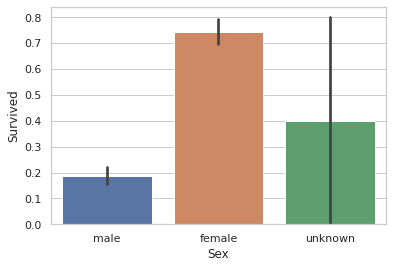

In [ ]:
sns.set_theme(style="whitegrid")
#sns.barplot(x="Sex", y="Survived", hue='Pclass', data=Data)
sns.barplot(x="Sex", y="Survived",  data=Data)

In [ ]:
Data[Data['Sex'] == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


You can fill-in manually

In [ ]:
Data.loc[[28,49], 'Sex'] = 'female'

In [ ]:
Data[Data['Sex'] == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


**6.** Delete records with unknown sex

In [ ]:
#Data = Data[Data['Sex'] !== 'unknown']
Data.drop(index = Data[Data['Sex'] == 'unknown'].index, inplace=True)

In [ ]:
Data[Data['Sex'] == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**7.** Encode column Sex

In [ ]:
#Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
#Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
Data.replace({'Sex': {'male': 1, 'female': 0}}, inplace = True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Data['Sex'] = Data['Sex'].map({1:'male', 0:'female'})
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## Use OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onee = OneHotEncoder(drop='first')

In [ ]:
Data['Sex'] = onee.fit_transform(Data[['Sex']]).toarray()

In [ ]:
onee.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


**8.** Explore next column 'Age'

In [ ]:
Data[Data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,Williams; Mr. Charles Eugene,1.0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,Masselmani; Mrs. Fatima,0.0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,Emir; Mr. Farred Chehab,1.0,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",0.0,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,Todoroff; Mr. Lalio,1.0,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,Razi; Mr. Raihed,1.0,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",0.0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,van Melkebeke; Mr. Philemon,1.0,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,Laleff; Mr. Kristo,1.0,NaN,0,0,349217,7.8958,NaN,S


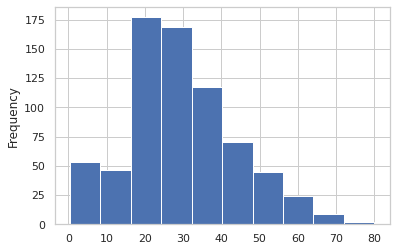

In [ ]:
Data['Age'].plot.hist()

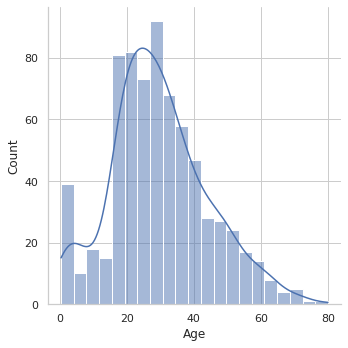

In [ ]:
sns.displot(Data.Age, kde=True)

In [ ]:
median_age = Data['Age'].median()
mean_age = Data['Age'].mean()
print(f'Median = {median_age},\nMean = {mean_age}')

Median = 28.0,
Mean = 29.7266011235955


In [ ]:
#Data.loc[Data[Data['Age'].isna()].index, 'Age'] = mean_age
#Data['Age'].fillna(mean_age, inplace=True)
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
Data['Age'] = imp.fit_transform(Data[['Age']])

In [ ]:
Data[Data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


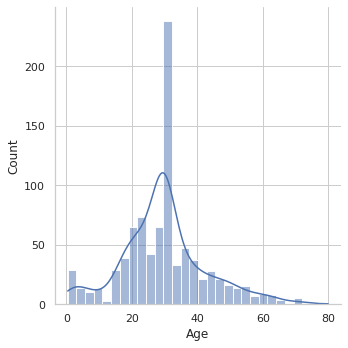

In [ ]:
sns.displot(Data.Age, kde=True)

In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    float64
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.5+ KB


**9.** Feature Embarked

In [ ]:
Data['Embarked'].value_counts(dropna=False)

S      642
C      168
Q       76
NaN      2
Name: Embarked, dtype: int64

In [ ]:
Data.dropna(subset=['Embarked'], inplace=True)

**10.** Check the data again

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    float64
 5   Age          886 non-null    float64
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 90.0+ KB


## One Factor Analysis

**11.** 'SibSp'

In [ ]:
Data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

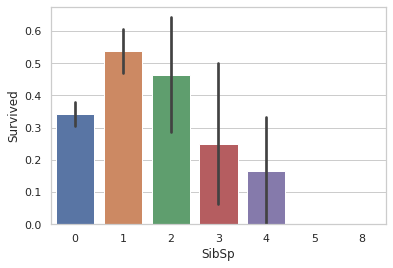

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=Data)

**12.** 'Parch'

In [ ]:
Data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

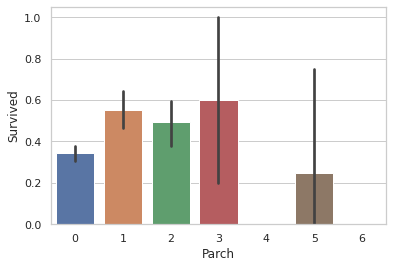

In [ ]:
sns.barplot(x='Parch', y='Survived', data=Data)

**13.** 'Embarked'

In [ ]:
Data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

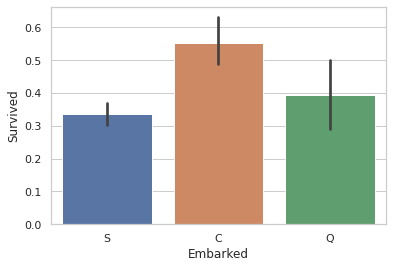

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=Data)

# One-Hot Encoder VS Ordinal Encoder (Label Encoder)
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [ ]:
#le = preprocessing.LabelEncoder()   #Use for y
from sklearn.preprocessing import OrdinalEncoder   #Use for X
from sklearn.preprocessing import OneHotEncoder

In [ ]:
orde = OrdinalEncoder()

In [ ]:
Data['Ord_Embarked'] = orde.fit_transform(Data[['Embarked']])
Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ord_Embarked
886,887,0,2,Montvila; Rev. Juozas,1.0,27.000000,0,0,211536,13.00,NaN,S,2.0
887,888,1,1,Graham; Miss. Margaret Edith,0.0,19.000000,0,0,112053,30.00,B42,S,2.0
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0.0,29.726601,1,2,W./C. 6607,23.45,NaN,S,2.0
889,890,1,1,Behr; Mr. Karl Howell,1.0,26.000000,0,0,111369,30.00,C148,C,0.0
890,891,0,3,Dooley; Mr. Patrick,1.0,32.000000,0,0,370376,7.75,NaN,Q,1.0


In [ ]:
#del Data['Ord_Embarked']
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
onee = OneHotEncoder()

In [ ]:
onee.fit_transform(Data[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
onee.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
Data[onee.categories_[0]] = onee.fit_transform(Data[['Embarked']]).toarray()

In [ ]:
Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
886,887,0,2,Montvila; Rev. Juozas,1.0,27.000000,0,0,211536,13.00,NaN,S,0.0,0.0,1.0
887,888,1,1,Graham; Miss. Margaret Edith,0.0,19.000000,0,0,112053,30.00,B42,S,0.0,0.0,1.0
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0.0,29.726601,1,2,W./C. 6607,23.45,NaN,S,0.0,0.0,1.0
889,890,1,1,Behr; Mr. Karl Howell,1.0,26.000000,0,0,111369,30.00,C148,C,1.0,0.0,0.0
890,891,0,3,Dooley; Mr. Patrick,1.0,32.000000,0,0,370376,7.75,NaN,Q,0.0,1.0,0.0


In [ ]:
Data.drop(columns = ['Embarked', 'C'], inplace=True)
Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
886,887,0,2,Montvila; Rev. Juozas,1.0,27.000000,0,0,211536,13.00,NaN,0.0,1.0
887,888,1,1,Graham; Miss. Margaret Edith,0.0,19.000000,0,0,112053,30.00,B42,0.0,1.0
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0.0,29.726601,1,2,W./C. 6607,23.45,NaN,0.0,1.0
889,890,1,1,Behr; Mr. Karl Howell,1.0,26.000000,0,0,111369,30.00,C148,0.0,0.0
890,891,0,3,Dooley; Mr. Patrick,1.0,32.000000,0,0,370376,7.75,NaN,1.0,0.0


In [ ]:
Data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
Data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
886,0,2,1.0,27.000000,0,0,13.00,0.0,1.0
887,1,1,0.0,19.000000,0,0,30.00,0.0,1.0
888,0,3,0.0,29.726601,1,2,23.45,0.0,1.0
889,1,1,1.0,26.000000,0,0,30.00,0.0,0.0
890,0,3,1.0,32.000000,0,0,7.75,1.0,0.0
